# Predicting if the credit application will be accepted or rejected.                                       

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Feature Description:
-  1)	Ind_ID: Client ID
-  2)	Gender: Gender information
-  3)	Car_owner: Having car or not
-  4)	Propert_owner: Having property or not
-  5)	Children: Count of children
-  6)	Annual_income: Annual income
-  7)	Type_Income: Income type
-  8)	Education: Education level
-  9)	Marital_status: Marital_status
-  10)	Housing_type: Living style
-  11)	Birthday_count: Use backward count from current day (0), -1 means yesterday.
-  12)	Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is    currently unemployed.
-  13)	Mobile_phone: Any mobile phone
-  14)	Work_phone: Any work phone
-  15)	Phone: Any phone number
-  16)	EMAIL_ID: Any email ID
-  17)	Type_Occupation: Occupation
-  18)	Family_Members: Family size
-  19)	Label: 0 is application approved and 1 is application rejected (Target Variable)


### READING THE DATA

In [2]:
# DATA ACQUISITION
df = pd.read_csv('credit_application.csv')
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [3]:
df.shape

(1548, 19)

In [4]:
df1 = df.copy()

### DATA PREPROCESSING/WRANGLING:

In [5]:
# HANDLIG NULL VALUES
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [6]:
def count_per_null(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Features':nv.index,'Count_Null':nv.values,
                         'Per_Null': (nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Per_Null',ascending=False)
    return nv_df

In [7]:
nv_df = count_per_null(df)
nv_df

,Features,Count_Null,Per_Null
3,Type_Occupation,488,31.524548
1,Annual_income,23,1.485788
2,Birthday_count,22,1.421189
0,GENDER,7,0.452196


In [8]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Type_Occupation'],
      dtype='object')
Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'label'],
      dtype='object')


In [9]:
# for categorical features:
for i in df[['Type_Occupation','GENDER']]:
    df[i] = df[i].fillna('NOT AVAILABLE')

In [10]:
count_per_null(df)

,Features,Count_Null,Per_Null
0,Annual_income,23,1.485788
1,Birthday_count,22,1.421189


In [11]:
# for numeric column
for i in df[['Annual_income']]:
    df[i] = df[i].fillna(df[i].median())

In [12]:
count_per_null(df)

,Features,Count_Null,Per_Null
0,Birthday_count,22,1.421189


In [13]:
df.dropna(inplace=True)
df.shape

(1526, 19)

### HANDLING DUPLICATES

In [14]:
df.duplicated().sum()

0

In [15]:
# INFERENCE:
# THERE ARE NO DUPLICATE VALUES

In [16]:
#check data types of each column
df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [17]:
#fetching unique values in each column
for i in df.columns:
    print(f'{i} - {df[i].nunique()}')

Ind_ID - 1526
GENDER - 3
Car_Owner - 2
Propert_Owner - 2
CHILDREN - 6
Annual_income - 115
Type_Income - 4
EDUCATION - 5
Marital_status - 5
Housing_type - 6
Birthday_count - 1270
Employed_days - 944
Mobile_phone - 1
Work_Phone - 2
Phone - 2
EMAIL_ID - 2
Type_Occupation - 19
Family_Members - 7
label - 2


In [18]:
cat_cols = df.dtypes[df.dtypes=='object'].index
con_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(con_cols)

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Type_Occupation'],
      dtype='object')
Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'label'],
      dtype='object')


In [19]:
real_cat_cols=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Type_Occupation','Mobile_phone','Work_Phone', 'Phone', 'EMAIL_ID']

In [20]:
real_con_cols=['CHILDREN', 'Annual_income', 'Birthday_count',
       'Employed_days','Family_Members']

In [21]:
df.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

## EXPLORATORY DATA ANALYSIS-EDA

### Bivariate analysis

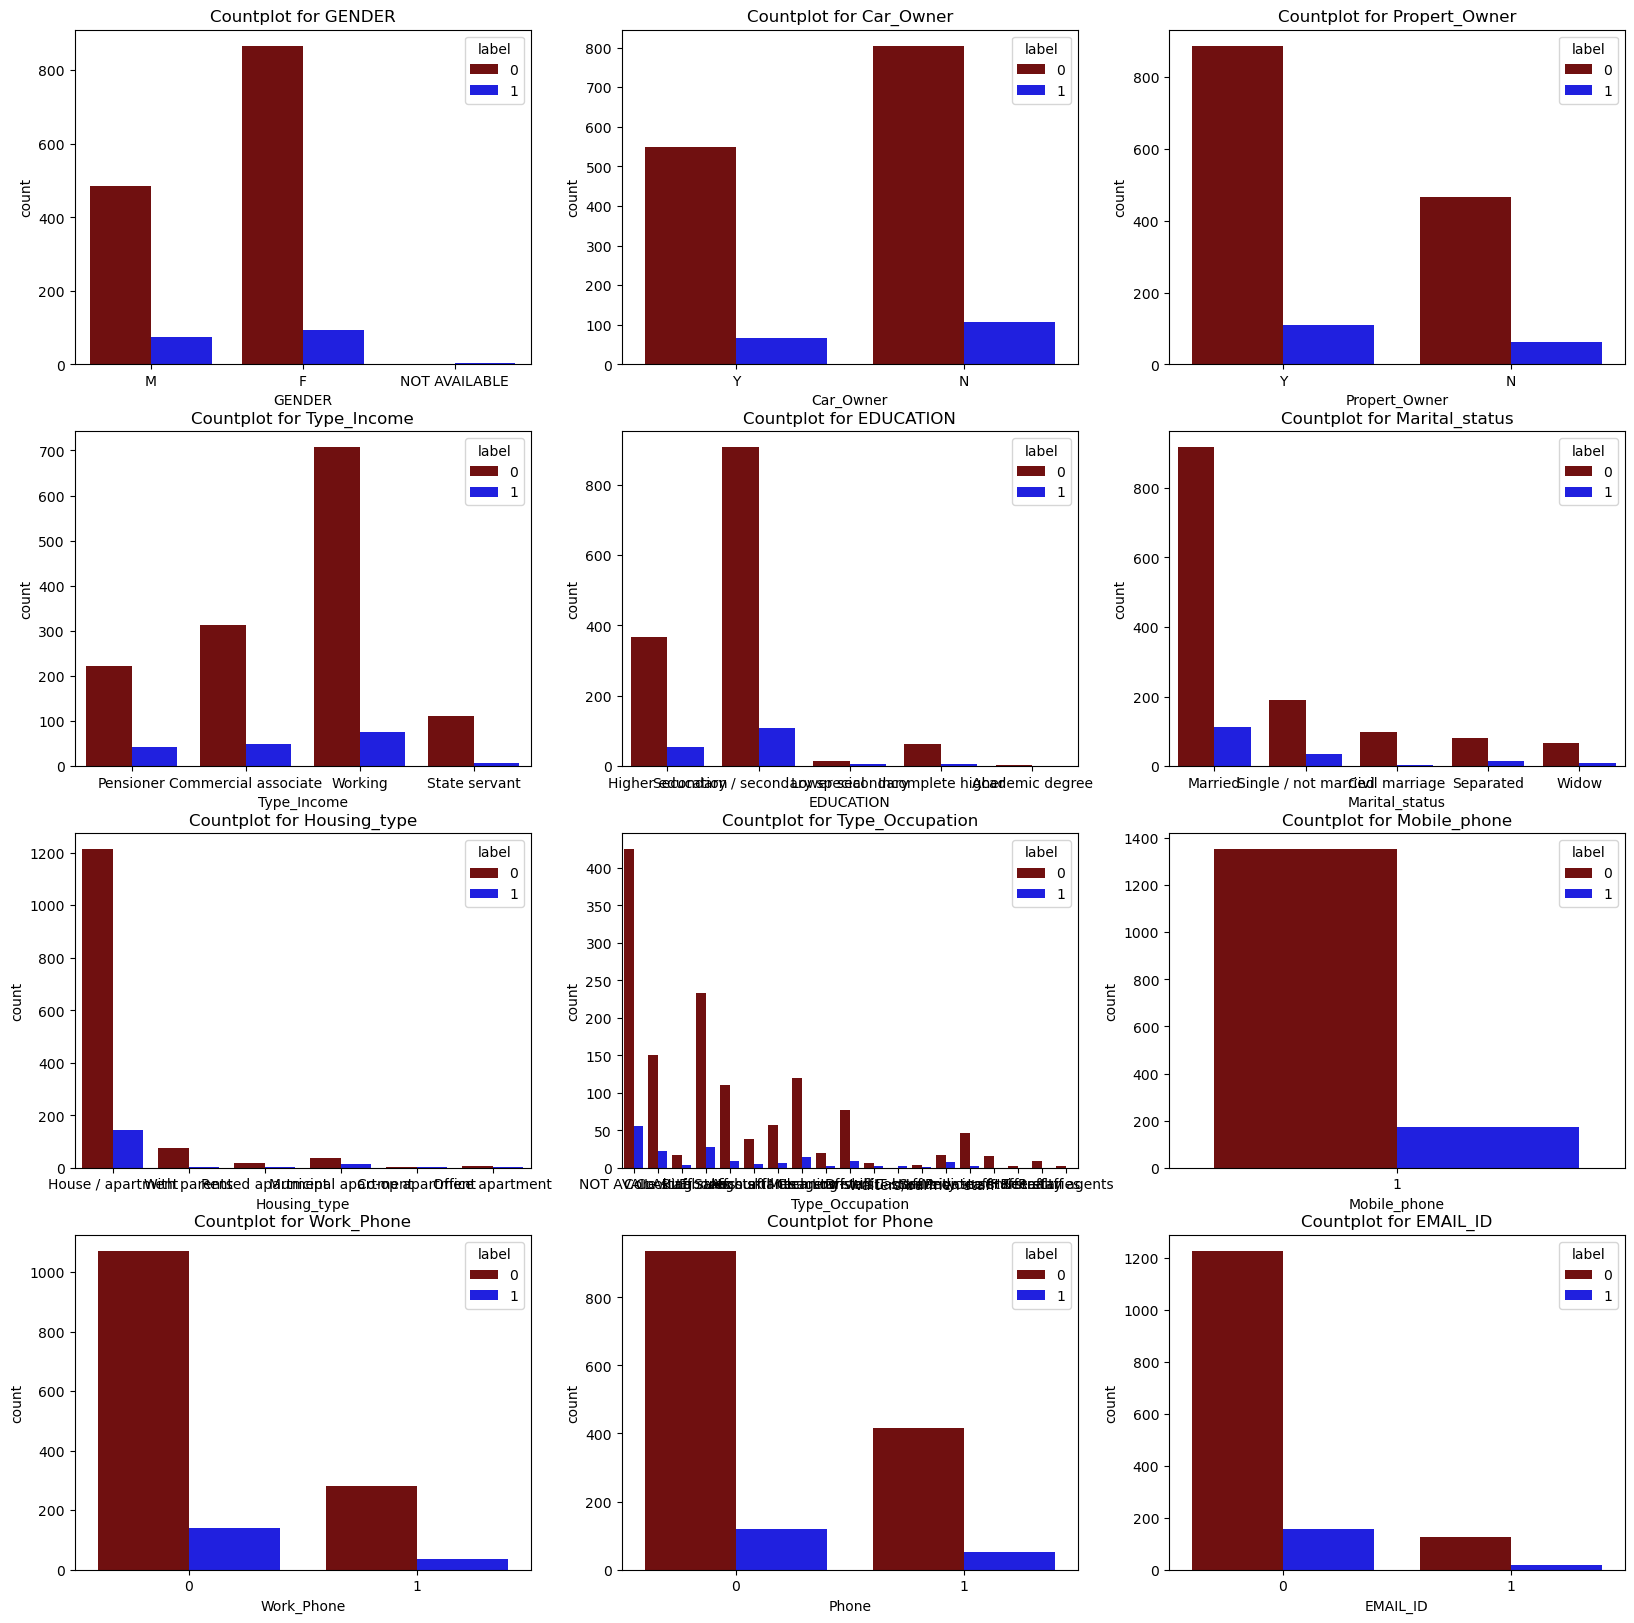

In [22]:
# COUNT PLOT
plt.figure(figsize=(20,20))
for i in range(0,len(real_cat_cols)):
    plt.subplot(4,3,i+1) 
    sns.countplot(x=df[real_cat_cols[i]],hue= df['label'],palette=['maroon','blue'])
    plt.title(f'Countplot for {real_cat_cols[i]}')
plt.show()

### inference:-
1. Female are more likely to get credit card.
2. people without car are highly likely to not recieve CC as per the data
3. property owners are highly likely to get credit card.
4. working professionals recieve more likely to recieve cc
5. married person may get a cc more likely


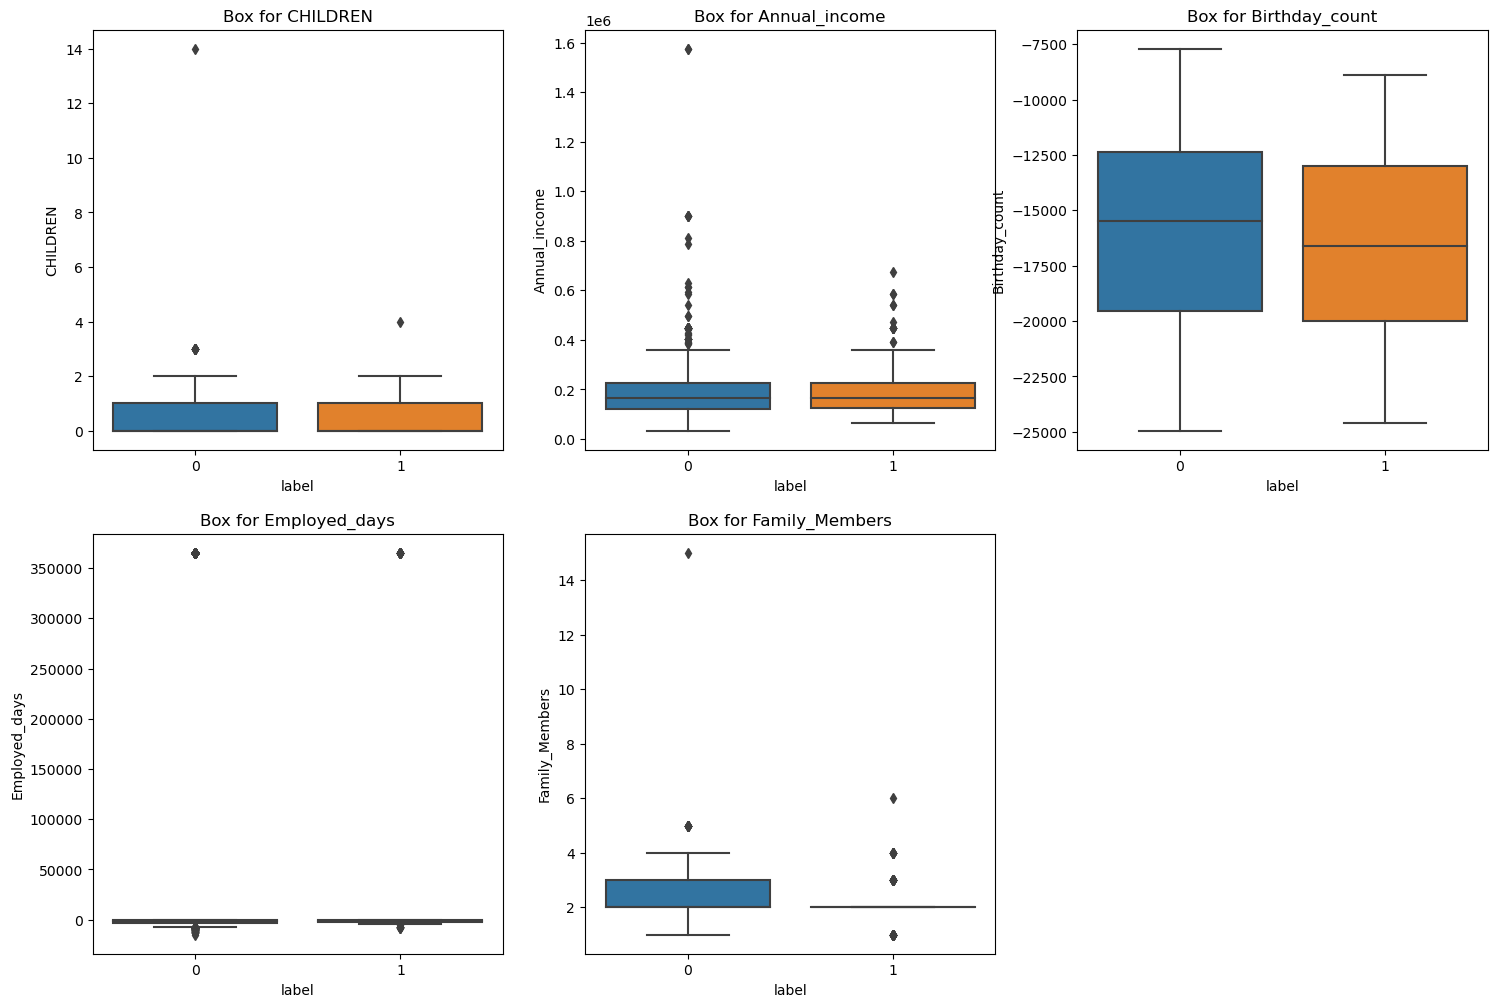

In [23]:
#box plot- continuous cols vs target
plt.figure(figsize=(18,12))
for i in range(0,len(real_con_cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=df[real_con_cols[i]],x=df['label'])
    plt.title(f'Box for {real_con_cols[i]}')
plt.show()

### inference:-
1. median of annual income of both getting cc and not getting cc is almost same
2. annual income has many outliers
3. people with more birthday count are likely to recieve cc
4. Employement days does not show significant difference on getting or not getting a cc
5. family with 2 members are highly likely to get cc

### GENDER BASED ANALYSIS

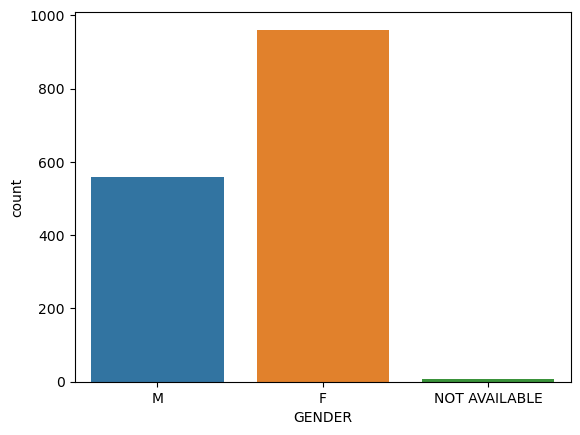

In [24]:
sns.countplot(x=df['GENDER'])
plt.show()

In [25]:
#GENDER WISE CREDIT CARD ACCEPTANCE RATE
r=df.groupby(['GENDER','label'])['label'].count()
print(type(r))
r

<class 'pandas.core.series.Series'>


GENDER         label
F              0        867
               1         94
M              0        484
               1         74
NOT AVAILABLE  0          2
               1          5
Name: label, dtype: int64

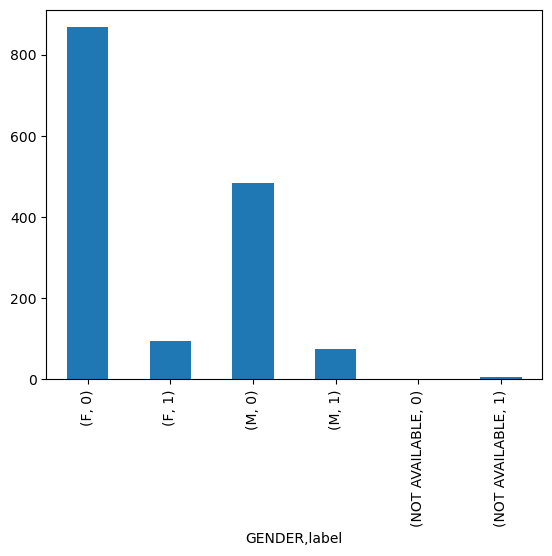

In [26]:
r.plot(kind='bar')
plt.show()

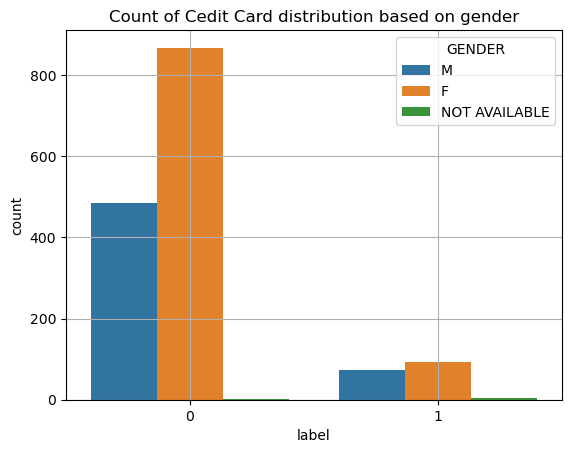

In [27]:
sns.countplot(x=df['label'],hue=df['GENDER']) #hue is used for grouping
plt.title('Count of Cedit Card distribution based on gender')
plt.grid()
plt.show()

In [28]:
r.unstack()

label,0,1
GENDER,,
F,867,94
M,484,74
NOT AVAILABLE,2,5


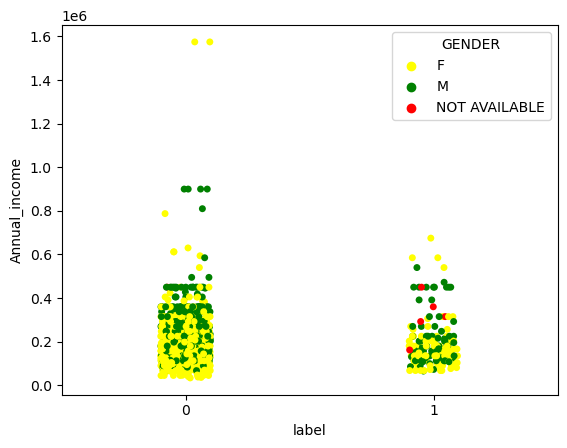

In [29]:
sns.stripplot(x=df['label'],y=df['Annual_income'],hue=df['GENDER'],palette=['yellow','green','red'])

plt.show()

#### INFERENCE:
1. female candidates are relatively less likely to get credit card.
2. unavailable gender category is highly likely to not get a credit card.

#### Correlation
<pre>
corr(a,b) = coor(b,a)
corr(a,a) = corr(b,b) = 1
corr ranges between -1 to 1

i) Corr amongst the independent features
ii) Corr of independent feature wrt target variable
</pre>

In [30]:
df[real_con_cols].head()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members
0,0,180000.0,-18772.0,365243,2
1,0,315000.0,-13557.0,-586,2
3,0,166500.0,-13557.0,-586,2
4,0,315000.0,-13557.0,-586,2
5,0,315000.0,-13557.0,-586,2


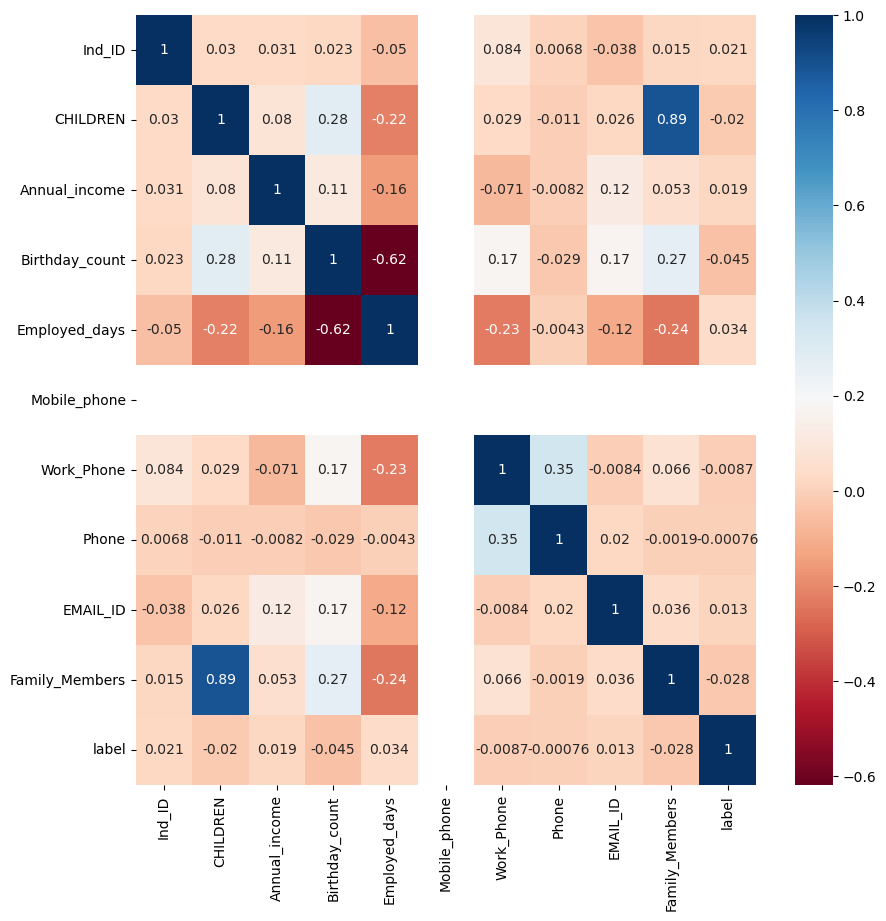

In [31]:
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

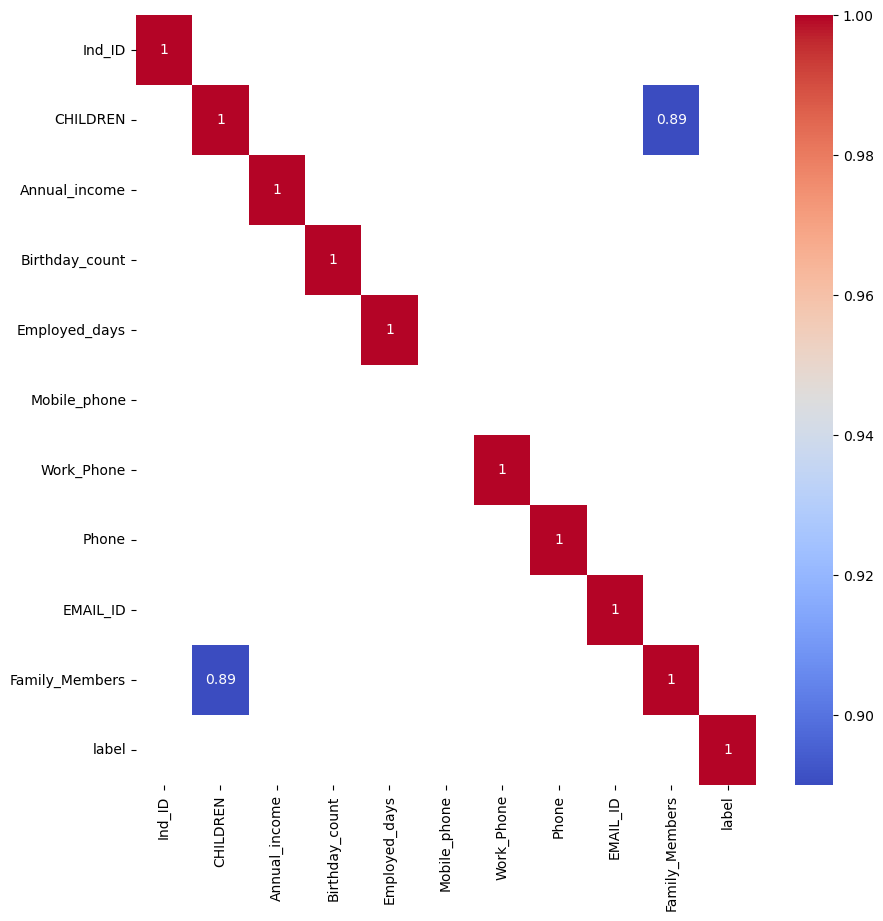

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(corr[abs(corr)>=0.7],annot=True,cmap='coolwarm')
plt.show()

In [33]:
#inference about highly corelated features here
# family members and no. of children are highly correlated features
# mobile phone shows 0 correlation

In [34]:
#dropping highly correlated feaures
df.drop(['Ind_ID','CHILDREN','Mobile_phone'],axis=1,inplace=True)
df.shape

(1526, 16)

## OUTLIER TREATMENT

In [35]:
real_con_cols=['Annual_income', 'Birthday_count',
       'Employed_days','Family_Members']

In [36]:
a = df[real_con_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,97%,98%,99%,max
Annual_income,33750.0,54000.00,67500.0,76500.00,166500.0,360000.0,450000.0,450000.0,573750.0,1575000.0
Birthday_count,-24946.0,-24304.25,-23839.5,-23235.75,-15661.5,-9891.5,-9477.0,-9151.5,-8917.0,-7705.0
Employed_days,-14887.0,-11232.25,-9361.0,-7310.00,-1569.0,365243.0,365243.0,365243.0,365243.0,365243.0
Family_Members,1.0,1.00,1.0,1.00,2.0,4.0,4.0,4.0,5.0,15.0


In [37]:
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [38]:
df[real_con_cols] = df[real_con_cols].apply(outlier_treatment)

In [39]:
#WE CAN SEE OUTLIERS ARE CLIPPED
a = df[real_con_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,97%,98%,99%,max
Annual_income,54000.00,54000.0000,67500.0,76500.00,166500.0,360000.0,450000.0,450000.0,565312.5,573750.0
Birthday_count,-24304.25,-24303.6875,-23839.5,-23235.75,-15661.5,-9891.5,-9477.0,-9151.5,-8924.5,-8917.0
Employed_days,-11232.25,-11114.6875,-9361.0,-7310.00,-1569.0,365243.0,365243.0,365243.0,365243.0,365243.0
Family_Members,1.00,1.0000,1.0,1.00,2.0,4.0,4.0,4.0,5.0,5.0


### Encoding categorical columns

In [40]:
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Type_Occupation'],
      dtype='object')


In [41]:
df.shape

(1526, 16)

In [42]:
df_dum = pd.get_dummies(df,columns=cat_cols,drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(1526, 46)
Index(['Annual_income', 'Birthday_count', 'Employed_days', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Family_Members', 'label', 'GENDER_M',
       'GENDER_NOT AVAILABLE', 'Car_Owner_Y', 'Propert_Owner_Y',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'EDUCATION_Higher education',
       'EDUCATION_Incomplete higher', 'EDUCATION_Lower secondary',
       'EDUCATION_Secondary / secondary special', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents',
       'Type_Occupation_Cleaning staff', 'Type_Occupation_Cooking staff',
       'Type_Occupation_Core staff', 'Type_Occupation_Drivers',
       'Type_Occupation_HR staff', 'Type_Occupation_High skill tech staff',
       'Type_Occupatio

In [43]:
df_dum.dtypes.value_counts()

uint8      38
int64       5
float64     3
dtype: int64

## SELECT X(Independant feature) AND Y(dependant feature)

In [44]:
df_dum.columns

Index(['Annual_income', 'Birthday_count', 'Employed_days', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Family_Members', 'label', 'GENDER_M',
       'GENDER_NOT AVAILABLE', 'Car_Owner_Y', 'Propert_Owner_Y',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'EDUCATION_Higher education',
       'EDUCATION_Incomplete higher', 'EDUCATION_Lower secondary',
       'EDUCATION_Secondary / secondary special', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents',
       'Type_Occupation_Cleaning staff', 'Type_Occupation_Cooking staff',
       'Type_Occupation_Core staff', 'Type_Occupation_Drivers',
       'Type_Occupation_HR staff', 'Type_Occupation_High skill tech staff',
       'Type_Occupation_IT staff'

In [45]:
x = df_dum.drop(['label'],axis=1) #TARGET COLUMN KA JO BHI NAAM HO VOH target KI JAGAH LIKHNA HAI
y = df_dum['label']
print(x.shape)
print(y.shape)

(1526, 45)
(1526,)


#### SLIPT DATA INTO TEST AND TRAIN

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1068, 45)
(458, 45)
(1068,)
(458,)


## FUNCTION TO EVALUATE MODEL

In [48]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
def eval_model1(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    cr = classification_report(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',cr)

def gen_res(model,xtrain,xtest,ytrain,ytest,ypred,model_name):
    eval_model1(ytest,ypred)
    train_acc = model.score(xtrain,ytrain)  # Train Acc
    test_acc = model.score(xtest,ytest)     # Test Acc
    pre1 = precision_score(ytest,ypred)  # pre score = 1
    rec1 = recall_score(ytest,ypred)     # rec score = 1
    res = pd.DataFrame({'Train Acc':train_acc,'Test Acc':test_acc,
                       'Pre1':pre1,'Rec1':rec1},index=[model_name])
    return res

### TRAIN THE MODEL

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### HYPER PARAMETER TUNING- Decision tree

##### GRID SEARCH CV

In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [51]:
hparams = {'criterion':['gini','entropy'],
          'max_depth':[4,5,6,7,8],
          'min_samples_split':[8,10,12,15,20]}

In [52]:
dt_model = DecisionTreeClassifier(random_state=0)

gs1 = GridSearchCV(dt_model,param_grid=hparams,scoring='accuracy',cv=5)
gs1.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [8, 10, 12, 15, 20]},
             scoring='accuracy')

In [53]:
print(gs1.best_params_)
print(gs1.best_estimator_)
print(gs1.best_score_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 15}
DecisionTreeClassifier(max_depth=4, min_samples_split=15, random_state=0)
0.8745381949014963


###### ANALYSIS OF GRID SEARCH CV RESULT

In [54]:
gs1_res = pd.DataFrame(gs1.cv_results_)
gs1_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007454,0.007031,0.000207,0.000413,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.869159,0.873832,0.873832,0.863850,0.882629,0.872660,0.006197,3
1,0.005339,0.005724,0.003773,0.006592,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.869159,0.873832,0.873832,0.863850,0.882629,0.872660,0.006197,3
2,0.005150,0.008039,0.003944,0.005923,gini,4,12,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.869159,0.873832,0.873832,0.863850,0.882629,0.872660,0.006197,3
3,0.008080,0.008171,0.001040,0.001330,gini,4,15,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.869159,0.869159,0.878505,0.873239,0.882629,0.874538,0.005306,1
4,0.006251,0.007656,0.000000,0.000000,gini,4,20,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.869159,0.869159,0.878505,0.873239,0.882629,0.874538,0.005306,1


In [55]:
print(gs1_res.shape)
print(gs1_res.columns)

(50, 16)
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_split',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [56]:
gs1_res = gs1_res[['param_criterion', 'param_max_depth', 'param_min_samples_split','params',
                  'mean_test_score','rank_test_score']]
gs1_res.head()

,param_criterion,param_max_depth,param_min_samples_split,params,mean_test_score,rank_test_score
0,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.872660,3
1,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.872660,3
2,gini,4,12,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.872660,3
3,gini,4,15,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.874538,1
4,gini,4,20,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.874538,1


In [57]:
gs1_res.sort_values('rank_test_score').head()  # asc order oF rank

,param_criterion,param_max_depth,param_min_samples_split,params,mean_test_score,rank_test_score
3,gini,4,15,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.874538,1
4,gini,4,20,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.874538,1
0,gini,4,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.872660,3
1,gini,4,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.872660,3
2,gini,4,12,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.872660,3


In [58]:
print(gs1.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 15}


In [59]:
# TRAINING DATA BASED ON GRIDSEARCH CV RESULTS
dt1 = DecisionTreeClassifier(**gs1.best_params_)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=15)

In [60]:
ypred_dt1 = dt1.predict(x_test)
dt1_res = gen_res(dt1,x_train,x_test,y_train,y_test,ypred_dt1,'DT1_GS1(ent/gini,md=5,mss=15)')
dt1_res

Confusion Matrix
 [[411   7]
 [ 39   1]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       418
           1       0.12      0.03      0.04        40

    accuracy                           0.90       458
   macro avg       0.52      0.50      0.49       458
weighted avg       0.84      0.90      0.87       458



,Train Acc,Test Acc,Pre1,Rec1
"DT1_GS1(ent/gini,md=5,mss=15)",0.890449,0.899563,0.125,0.025


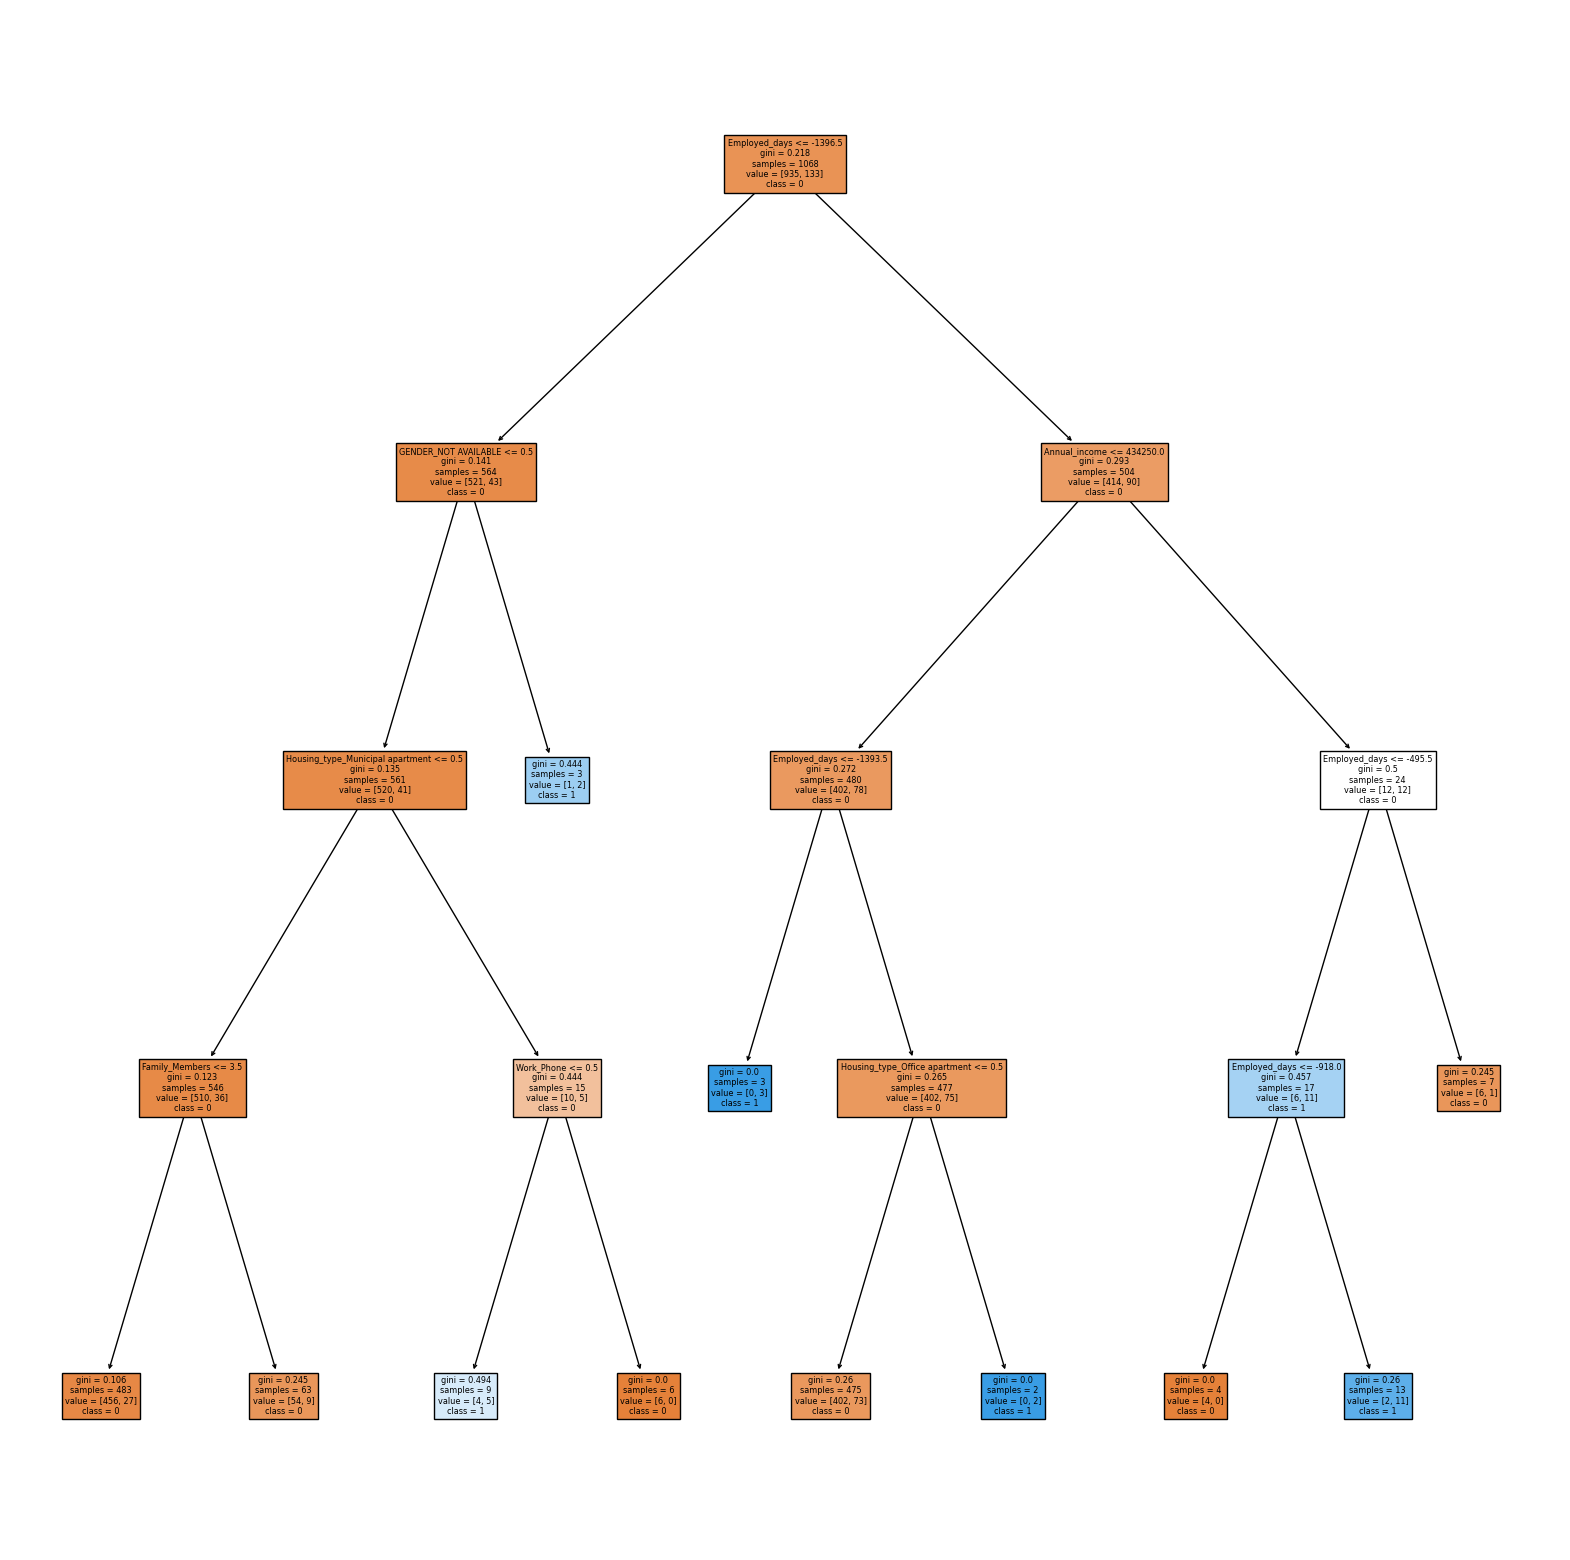

In [61]:
from sklearn.tree import plot_tree
cn = ['0','1'] #class names in target variable
plt.figure(figsize=(20,20))
plot_tree(dt1,feature_names=x_train.columns,class_names=cn,filled=True)
plt.show()

### RANDOMISED SEARCH CV

In [62]:
dt_model1 = DecisionTreeClassifier(random_state=0)
rs1 = RandomizedSearchCV(dt_model1,param_distributions=hparams,scoring='accuracy',cv=5,
                        n_iter=20)  
# n_iter = number of random cobintaion to select best hparams from
rs1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=20,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'min_samples_split': [8, 10, 12, 15,
                                                              20]},
                   scoring='accuracy')

In [63]:
print(rs1.best_params_)
print(rs1.best_estimator_)
print(rs1.best_score_)

{'min_samples_split': 12, 'max_depth': 4, 'criterion': 'gini'}
DecisionTreeClassifier(max_depth=4, min_samples_split=12, random_state=0)
0.8726602606291959


In [64]:
rs1_res = pd.DataFrame(rs1.cv_results_)
print(rs1_res.shape)

(20, 16)


In [65]:
# TRAINING DATA BASED ON GRIDSEARCH CV RESULTS
dt2 = DecisionTreeClassifier(**rs1.best_params_)
dt2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=12)

In [66]:
ypred_dt2 = dt2.predict(x_test)
dt2_res = gen_res(dt2,x_train,x_test,y_train,y_test,ypred_dt1,'DT2_RS1(ent/gini,md=5,mss=20)')
dt2_res

Confusion Matrix
 [[411   7]
 [ 39   1]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       418
           1       0.12      0.03      0.04        40

    accuracy                           0.90       458
   macro avg       0.52      0.50      0.49       458
weighted avg       0.84      0.90      0.87       458



,Train Acc,Test Acc,Pre1,Rec1
"DT2_RS1(ent/gini,md=5,mss=20)",0.890449,0.899563,0.125,0.025


# Logistic Regression

In [67]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [68]:
ypred_lr1 = lr1.predict(x_test)
lr1_res = gen_res(lr1,x_train,x_test,y_train,y_test,ypred_lr1,'LogReg')

Confusion Matrix
 [[418   0]
 [ 40   0]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       418
           1       0.00      0.00      0.00        40

    accuracy                           0.91       458
   macro avg       0.46      0.50      0.48       458
weighted avg       0.83      0.91      0.87       458



### CONCATING AND COMPARING ACCURACY OF EACH MODEL 

In [69]:
model_res = pd.concat([dt1_res,dt2_res,lr1_res])
model_res

,Train Acc,Test Acc,Pre1,Rec1
"DT1_GS1(ent/gini,md=5,mss=15)",0.890449,0.899563,0.125,0.025
"DT2_RS1(ent/gini,md=5,mss=20)",0.890449,0.899563,0.125,0.025
LogReg,0.875468,0.912664,0.000,0.000


## Random Forest Classifier

In [70]:
x1=x_train
y1=y_train
print(x1.shape)
print(y1.shape)

(1068, 45)
(1068,)


In [71]:
from collections import Counter
c = Counter(y1)
print(c)

Counter({0: 935, 1: 133})


In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x_train,y_train)

In [74]:
from collections import Counter
c = Counter(y_sm)
print(c)

Counter({0: 935, 1: 935})


In [75]:
print(x_sm.shape)
print(x_test.shape)
print(y_sm.shape)
print(y_test.shape)

(1870, 45)
(458, 45)
(1870,)
(458,)


In [76]:
base_rf = RandomForestClassifier(random_state=0)  # n_estimators=100
base_rf.fit(x_train,y_train)
ypred_rf = base_rf.predict(x_test)
base_rf_res = gen_res(base_rf,x_train,x_test,y_train,y_test,ypred_rf,'Base RF')

Confusion Matrix
 [[412   6]
 [ 24  16]]
Classification Report
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       418
           1       0.73      0.40      0.52        40

    accuracy                           0.93       458
   macro avg       0.84      0.69      0.74       458
weighted avg       0.93      0.93      0.93       458



In [77]:
base_rf_res

,Train Acc,Test Acc,Pre1,Rec1
Base RF,0.995318,0.934498,0.727273,0.4


In [78]:
base_sm_rf = RandomForestClassifier(random_state=0)  # n_estimators=100
base_sm_rf.fit(x_sm,y_sm)
ypred_sm_rf = base_sm_rf.predict(x_test)
base_sm_rf_res = gen_res(base_sm_rf,x_sm,x_test,y_sm,y_test,ypred_sm_rf,'Base SMOTE-RF')

Confusion Matrix
 [[403  15]
 [ 23  17]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       418
           1       0.53      0.42      0.47        40

    accuracy                           0.92       458
   macro avg       0.74      0.69      0.71       458
weighted avg       0.91      0.92      0.91       458



In [79]:
# applying smote is not helping in covering the overfit

### Feature_Importance

In [80]:
feat_imp = pd.DataFrame({'Feature':x_sm.columns,'FeatImp':base_sm_rf.feature_importances_})
# Normalized feature importance
feat_imp = feat_imp.sort_values('FeatImp',ascending=False)
feat_imp

,Feature,FeatImp
1,Birthday_count,0.136199
0,Annual_income,0.117823
2,Employed_days,0.104736
13,Type_Income_Working,0.059639
17,EDUCATION_Secondary / secondary special,0.052843
6,Family_Members,0.046971
14,EDUCATION_Higher education,0.035174
10,Propert_Owner_Y,0.032322
22,Housing_type_House / apartment,0.030947
4,Phone,0.029763


In [81]:
thresh = 0.005  # assumed threshold
feat_in_model = feat_imp['Feature'][feat_imp['FeatImp']>=thresh].values
feat_in_model

array(['Birthday_count', 'Annual_income', 'Employed_days',
       'Type_Income_Working', 'EDUCATION_Secondary / secondary special',
       'Family_Members', 'EDUCATION_Higher education', 'Propert_Owner_Y',
       'Housing_type_House / apartment', 'Phone',
       'Type_Occupation_NOT AVAILABLE', 'Car_Owner_Y',
       'Marital_status_Married', 'Work_Phone',
       'Type_Income_State servant', 'GENDER_M',
       'Type_Occupation_Laborers', 'Marital_status_Single / not married',
       'Type_Occupation_Sales staff', 'Marital_status_Widow',
       'Marital_status_Separated', 'EDUCATION_Incomplete higher',
       'Housing_type_With parents', 'Type_Occupation_Core staff',
       'Type_Occupation_Managers', 'EMAIL_ID', 'Type_Occupation_Drivers',
       'Type_Income_Pensioner', 'Type_Occupation_High skill tech staff',
       'Type_Occupation_Medicine staff'], dtype=object)

In [82]:
# RF Model-2
x2 = df_dum[feat_in_model]
y2 = df_dum['label']
print(x2.shape)
print(y2.shape)

(1526, 30)
(1526,)


In [83]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.3,random_state=42)
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(1068, 30)
(458, 30)
(1068,)
(458,)


In [84]:
c=Counter(y_train2)
c

Counter({0: 935, 1: 133})

In [85]:
sm2 = SMOTE()
x_sm2,y_sm2 = sm2.fit_resample(x_train2,y_train2)

In [86]:
rf2 = RandomForestClassifier(random_state=0)  # n_estimators=100
rf2.fit(x_sm2,y_sm2)
ypred_rf2 = rf2.predict(x_test2)
rf2_res = gen_res(rf2,x_sm2,x_test2,y_sm2,y_test2,ypred_rf2,'Base_rf2_Feature Eng')

Confusion Matrix
 [[406  12]
 [ 22  18]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       418
           1       0.60      0.45      0.51        40

    accuracy                           0.93       458
   macro avg       0.77      0.71      0.74       458
weighted avg       0.92      0.93      0.92       458



In [87]:
# RF model-2- GRID SEARCH CV
hparams_rf = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8],
              'min_samples_split':[8,10,12,15,20]}

In [88]:
rf_gs = RandomForestClassifier(random_state=0)
gs2 = GridSearchCV(estimator=rf_gs,param_grid=hparams_rf,
                   scoring='accuracy',
                   cv=3)
gs2.fit(x_sm2,y_sm2)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [8, 10, 12, 15, 20]},
             scoring='accuracy')

In [89]:
print(gs2.best_params_)
print(gs2.best_estimator_)
print(gs2.best_score_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 10}
RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10,
                       random_state=0)
0.8807963260210451


In [90]:
rf3 = RandomForestClassifier(random_state=0,**gs2.best_params_)
rf3.fit(x_sm2,y_sm2)
ypred_rf3 = rf3.predict(x_test2)
rf3_res = gen_res(rf3,x_sm2,x_test2,y_sm2,y_test2,ypred_rf3,'GRID SEARCH RF_Feature engineering')

Confusion Matrix
 [[360  58]
 [ 28  12]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       418
           1       0.17      0.30      0.22        40

    accuracy                           0.81       458
   macro avg       0.55      0.58      0.56       458
weighted avg       0.86      0.81      0.83       458



In [91]:
res = pd.concat([model_res,base_rf_res,base_sm_rf_res,rf2_res,rf3_res])
res

,Train Acc,Test Acc,Pre1,Rec1
"DT1_GS1(ent/gini,md=5,mss=15)",0.890449,0.899563,0.125000,0.025
"DT2_RS1(ent/gini,md=5,mss=20)",0.890449,0.899563,0.125000,0.025
LogReg,0.875468,0.912664,0.000000,0.000
Base RF,0.995318,0.934498,0.727273,0.400
Base SMOTE-RF,0.997326,0.917031,0.531250,0.425
Base_rf2_Feature Eng,0.997326,0.925764,0.600000,0.450
GRID SEARCH RF_Feature engineering,0.924064,0.812227,0.171429,0.300


# inference:-
#### Best Model is Random Forest Classifier after Feature Engineering and Over Sampling using SMOTE

## SAVING THE MODEL

In [92]:
import pickle

In [93]:
pickle.dump(rf2_res,open('Creditcardapplication.pkl','wb'))  # write binary

In [94]:
model = pickle.load(open('Creditcardapplication.pkl','rb'))